**Primeira parte: Análise de Portfólio**

In [1]:
!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.49
    Uninstalling yfinance-0.2.49:
      Successfully uninstalled yfinance-0.2.49


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [5]:
acoes = ['BBAS3.SA', 'CMIG4.SA', 'AZZA3.SA','MRVE3.SA', 'GGBR4.SA', 'TOTS3.SA']

ydata = yf.download(acoes, '2015-01-01', '2023-12-31', '1d');
dados = ydata["Adj Close"]

[*********************100%***********************]  6 of 6 completed


In [6]:
dados = dados *100 / dados.iloc[0]
display(dados)

Ticker,AZZA3.SA,BBAS3.SA,CMIG4.SA,GGBR4.SA,MRVE3.SA,TOTS3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,96.866545,97.924920,97.421868,95.419843,98.201918,96.927368
2015-01-06,94.970988,99.293578,96.562480,105.452575,100.829868,90.865893
2015-01-07,95.938119,103.664454,96.562480,113.195203,103.042889,90.223441
2015-01-08,95.473863,104.017654,95.781257,110.577970,104.287697,92.318433
...,...,...,...,...,...,...
2023-12-21,323.135563,421.928833,270.095542,403.317838,249.278957,322.966397
2023-12-22,325.528792,423.094590,273.097389,407.626778,249.978540,318.124311
2023-12-26,324.307729,426.980458,278.306361,406.764982,250.678100,324.709557


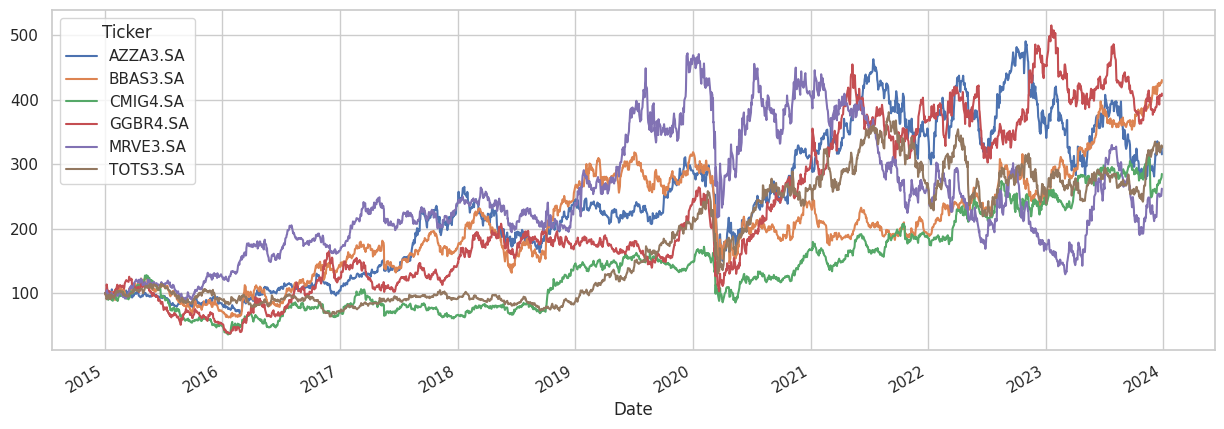

In [7]:
dados.plot(figsize = (15,5));

In [8]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [9]:
ret_acc = (dados.iloc[-1] / dados.iloc[0])-1
print("Retorno acumulado:\n", ret_acc)

Retorno acumulado:
 Ticker
AZZA3.SA    2.151744
BBAS3.SA    3.304777
CMIG4.SA    1.847556
GGBR4.SA    3.095227
MRVE3.SA    1.618712
TOTS3.SA    2.262590
dtype: float64


In [10]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/9))-1
print("Retorno anualizado:\n", ret_aa)

Retorno anualizado:
 Ticker
AZZA3.SA    0.136042
BBAS3.SA    0.176086
CMIG4.SA    0.123303
GGBR4.SA    0.169583
MRVE3.SA    0.112895
TOTS3.SA    0.140414
dtype: float64


In [11]:
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol anualizada:\n", vol_aa)

Vol anualizada:
 Ticker
AZZA3.SA    0.402268
BBAS3.SA    0.422337
CMIG4.SA    0.426859
GGBR4.SA    0.466706
MRVE3.SA    0.456425
TOTS3.SA    0.386286
dtype: float64


In [12]:
#Calculo da correlação dos dados
dados_chg.corr()

Ticker,AZZA3.SA,BBAS3.SA,CMIG4.SA,GGBR4.SA,MRVE3.SA,TOTS3.SA
Ticker,,,,,,
AZZA3.SA,1.000000,0.418065,0.375098,0.296031,0.466502,0.407206
BBAS3.SA,0.418065,1.000000,0.579829,0.452335,0.448613,0.336670
CMIG4.SA,0.375098,0.579829,1.000000,0.390110,0.389828,0.321258
GGBR4.SA,0.296031,0.452335,0.390110,1.000000,0.283122,0.248796
MRVE3.SA,0.466502,0.448613,0.389828,0.283122,1.000000,0.364910
TOTS3.SA,0.407206,0.336670,0.321258,0.248796,0.364910,1.000000


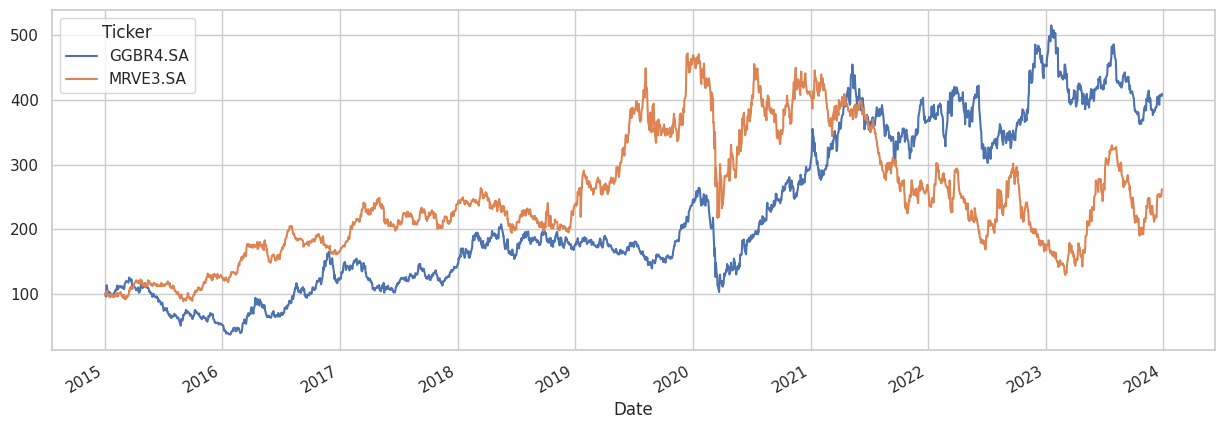

In [13]:
dados[['GGBR4.SA', 'MRVE3.SA']].plot(figsize = (15,5));

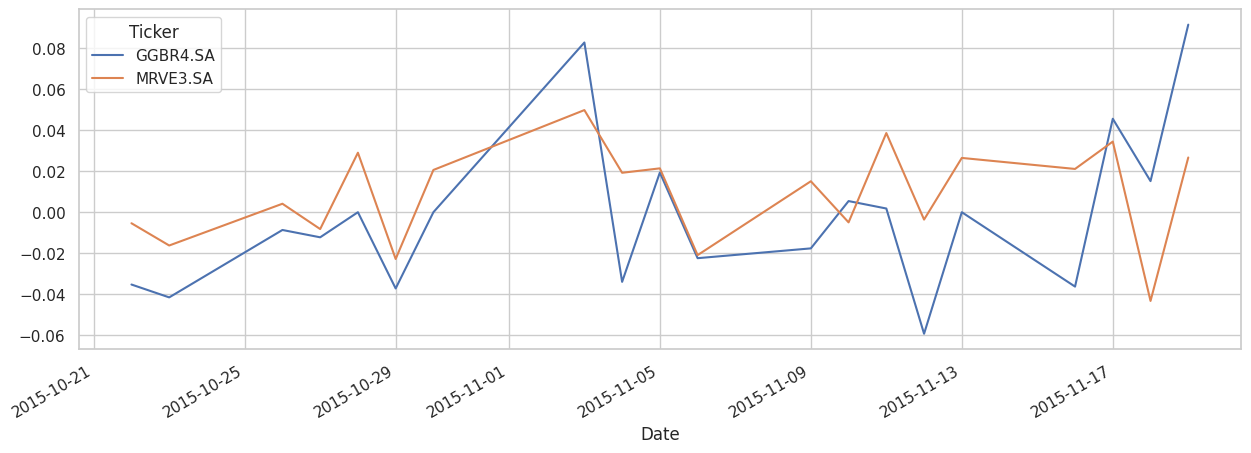

In [14]:
dados_chg[['GGBR4.SA', 'MRVE3.SA']].iloc[200:220].plot(figsize = (15,5));

In [15]:
port_pesos = [0, 0, 0, 0.5, 0.5, 0]
dados['PORT1'] = dados.dot(port_pesos)

In [16]:
display(dados)

Ticker,AZZA3.SA,BBAS3.SA,CMIG4.SA,GGBR4.SA,MRVE3.SA,TOTS3.SA,PORT1
Date,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,96.866545,97.924920,97.421868,95.419843,98.201918,96.927368,96.810880
2015-01-06,94.970988,99.293578,96.562480,105.452575,100.829868,90.865893,103.141221
2015-01-07,95.938119,103.664454,96.562480,113.195203,103.042889,90.223441,108.119046
2015-01-08,95.473863,104.017654,95.781257,110.577970,104.287697,92.318433,107.432834
...,...,...,...,...,...,...,...
2023-12-21,323.135563,421.928833,270.095542,403.317838,249.278957,322.966397,326.298397
2023-12-22,325.528792,423.094590,273.097389,407.626778,249.978540,318.124311,328.802659
2023-12-26,324.307729,426.980458,278.306361,406.764982,250.678100,324.709557,328.721541


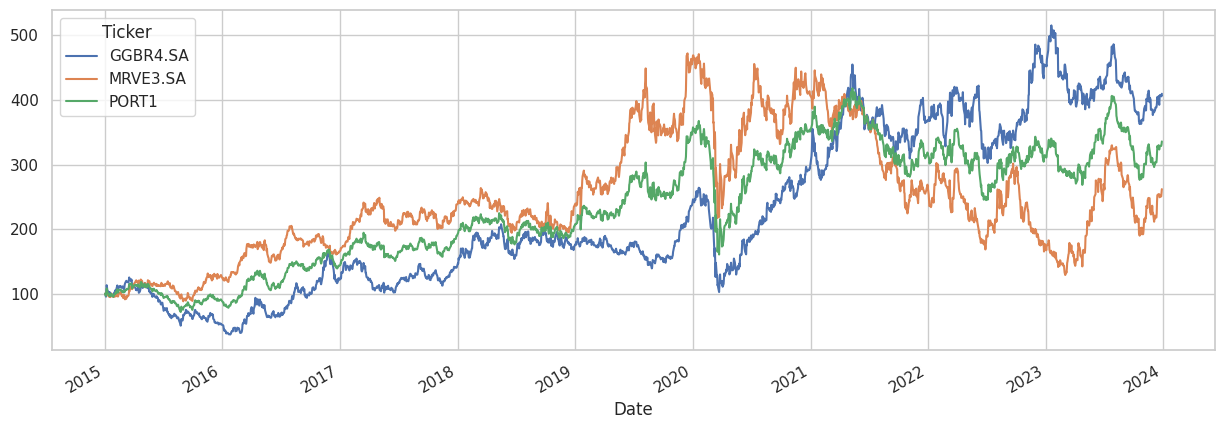

In [17]:
dados[['GGBR4.SA', 'MRVE3.SA', 'PORT1']].plot(figsize = (15,5));

In [18]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [19]:
ret_acc = (dados.iloc[dados.count()[0]-1] / dados.iloc[0])-1
print("Retorno acumulado:\n", ret_acc)
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/9))-1
print("Ret aa:\n", ret_aa)


Retorno acumulado:
 Ticker
AZZA3.SA    2.151744
BBAS3.SA    3.304777
CMIG4.SA    1.847556
GGBR4.SA    3.095227
MRVE3.SA    1.618712
TOTS3.SA    2.262590
PORT1       2.356969
dtype: float64
Ret aa:
 Ticker
AZZA3.SA    0.136042
BBAS3.SA    0.176086
CMIG4.SA    0.123303
GGBR4.SA    0.169583
MRVE3.SA    0.112895
TOTS3.SA    0.140414
PORT1       0.144033
dtype: float64


<ipython-input-19-5e92a9ea1aac>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret_acc = (dados.iloc[dados.count()[0]-1] / dados.iloc[0])-1


In [20]:
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Vol aa:
 Ticker
AZZA3.SA    0.402268
BBAS3.SA    0.422337
CMIG4.SA    0.426859
GGBR4.SA    0.466706
MRVE3.SA    0.456425
TOTS3.SA    0.386286
PORT1       0.358174
dtype: float64


In [21]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

<ipython-input-21-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-21-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-21-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-21-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as

AZZA3.SA   -51.781024
BBAS3.SA   -58.286993
CMIG4.SA   -72.178151
GGBR4.SA   -70.529927
MRVE3.SA   -72.684982
TOTS3.SA   -49.713333
PORT1      -56.256918
dtype: float64


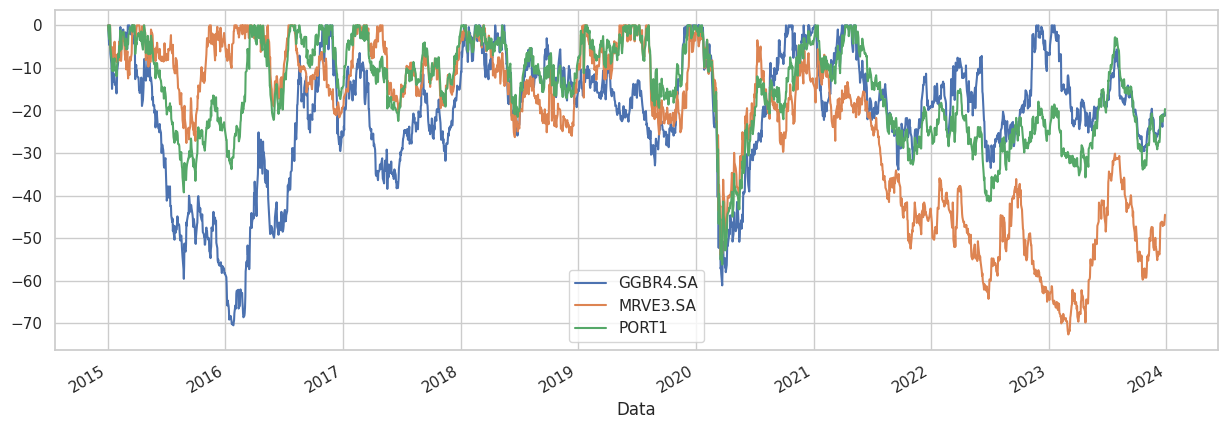

In [23]:
ddown[['GGBR4.SA', 'MRVE3.SA', 'PORT1']].plot(figsize = (15,5));

**Segunda parte: Fronteira Eficiente de Markowitz**

In [24]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [25]:
dados

Ticker,AZZA3.SA,BBAS3.SA,CMIG4.SA,GGBR4.SA,MRVE3.SA,TOTS3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,96.866545,97.924920,97.421868,95.419843,98.201918,96.927368
2015-01-06,94.970988,99.293578,96.562480,105.452575,100.829868,90.865893
2015-01-07,95.938119,103.664454,96.562480,113.195203,103.042889,90.223441
2015-01-08,95.473863,104.017654,95.781257,110.577970,104.287697,92.318433
...,...,...,...,...,...,...
2023-12-21,323.135563,421.928833,270.095542,403.317838,249.278957,322.966397
2023-12-22,325.528792,423.094590,273.097389,407.626778,249.978540,318.124311
2023-12-26,324.307729,426.980458,278.306361,406.764982,250.678100,324.709557


In [26]:
def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg =port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/9))-1
  vol = port_chg.std()*np.sqrt(252)
  return ret, vol

In [27]:
#Portfolio com 2 ativos: GGBR4 e MRVE3
points = []
min_vol_ret = [100, 0] #[vol, ret]
port_pesos = [0, 0, 0, 0, 0, 0]
for w in range(0, 101, 5):
  ret, vol = calc_ret_vol(dados, dados_chg, [0, 0, 0, w/100, (1-w/100), 0])
  #ret, vol = calc_ret_vol(dados, dados_chg, [0, 0,  w/100, 0, (1-w/100), 0])
  print(f"Aloc:{round(w/100, 2):.2f} {round(1-(w/100),2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
  points.append([ret, vol])
  if vol < min_vol_ret[0]:
    min_vol_ret[0] = vol
    min_vol_ret[1] = ret
    port_pesos[3] = w/100
    port_pesos[4] = 1-w/100

Aloc:0.00 1.00 Ret:0.113 Vol:0.456
Aloc:0.05 0.95 Ret:0.116 Vol:0.438
Aloc:0.10 0.90 Ret:0.120 Vol:0.423
Aloc:0.15 0.85 Ret:0.123 Vol:0.409
Aloc:0.20 0.80 Ret:0.126 Vol:0.396
Aloc:0.25 0.75 Ret:0.129 Vol:0.386
Aloc:0.30 0.70 Ret:0.132 Vol:0.377
Aloc:0.35 0.65 Ret:0.135 Vol:0.370
Aloc:0.40 0.60 Ret:0.138 Vol:0.364
Aloc:0.45 0.55 Ret:0.141 Vol:0.360
Aloc:0.50 0.50 Ret:0.144 Vol:0.358
Aloc:0.55 0.45 Ret:0.147 Vol:0.358
Aloc:0.60 0.40 Ret:0.150 Vol:0.360
Aloc:0.65 0.35 Ret:0.152 Vol:0.363
Aloc:0.70 0.30 Ret:0.155 Vol:0.369
Aloc:0.75 0.25 Ret:0.157 Vol:0.378
Aloc:0.80 0.20 Ret:0.160 Vol:0.389
Aloc:0.85 0.15 Ret:0.162 Vol:0.403
Aloc:0.90 0.10 Ret:0.165 Vol:0.420
Aloc:0.95 0.05 Ret:0.167 Vol:0.441
Aloc:1.00 0.00 Ret:0.170 Vol:0.467


In [28]:
print(min_vol_ret)
print(port_pesos)

[0.35787119003943185, 0.1468016477163092]
[0, 0, 0, 0.55, 0.44999999999999996, 0]


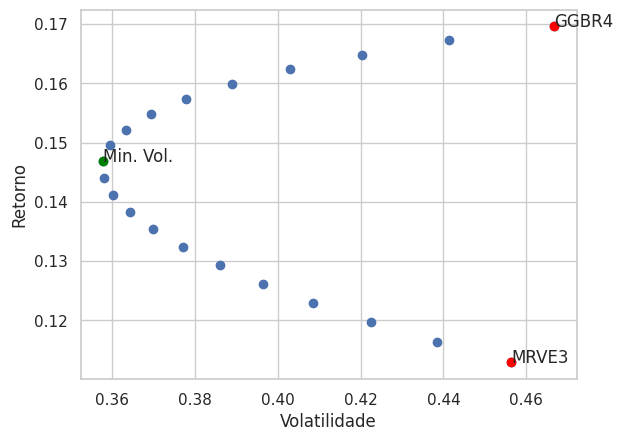

In [29]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['GGBR4.SA'], ret_aa['GGBR4.SA'], color='red');
plt.text(vol_aa['GGBR4.SA'], ret_aa['GGBR4.SA'], 'GGBR4');

plt.scatter(vol_aa['MRVE3.SA'], ret_aa['MRVE3.SA'], color='red');
plt.text(vol_aa['MRVE3.SA'], ret_aa['MRVE3.SA'], 'MRVE3');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [30]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [31]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/9))-1
print("Ret aa:\n", ret_aa)
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Ret aa:
 Ticker
AZZA3.SA    0.136042
BBAS3.SA    0.176086
CMIG4.SA    0.123303
GGBR4.SA    0.169583
MRVE3.SA    0.112895
TOTS3.SA    0.140414
PORT1       0.146802
dtype: float64
Vol aa:
 Ticker
AZZA3.SA    0.402268
BBAS3.SA    0.422337
CMIG4.SA    0.426859
GGBR4.SA    0.466706
MRVE3.SA    0.456425
TOTS3.SA    0.386286
PORT1       0.357871
dtype: float64


In [32]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

<ipython-input-32-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-32-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-32-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-32-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as

AZZA3.SA   -51.781024
BBAS3.SA   -58.286993
CMIG4.SA   -72.178151
GGBR4.SA   -70.529927
MRVE3.SA   -72.684982
TOTS3.SA   -49.713333
PORT1      -56.617559
dtype: float64


<ipython-input-32-d59086c8cd39>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):


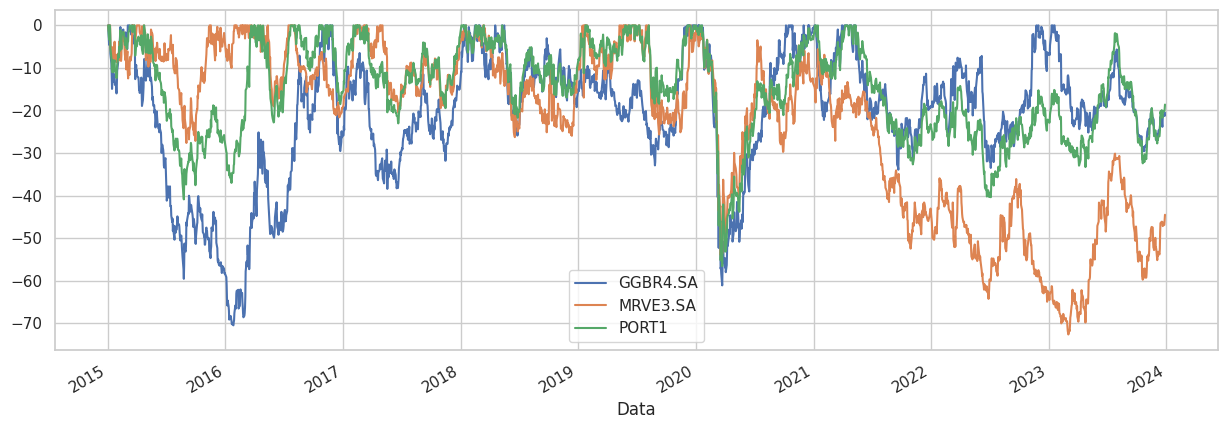

In [33]:
ddown[['GGBR4.SA', 'MRVE3.SA', 'PORT1']].plot(figsize = (15,5));

In [34]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [35]:
#Portfolio com 3 ativos: TOTS3, MRVE3 e GGBR4
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0, 0, 0]
for w1 in range(0, 101, 5):
  for w2 in range(0, 101-w1, 5):
    ret, vol = calc_ret_vol(dados, dados_chg, [0, 0, 0, w1/100, w2/100, (1-w1/100-w2/100)])
    #print("Aloc:", round(w1/100, 2), round(w2/100, 2), round(1-w1/100-w2/100, 2), "Ret:", round(ret, 3), "Vol:", round(vol, 3))
    print(f"Aloc:{round(w1/100, 2):.2f} {round(w2/100, 2):.2f} {round(1-w1/100-w2/100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      port_pesos[3] = w1/100
      port_pesos[4] = w2/100
      port_pesos[5] = 1-w1/100-w2/100

Aloc:0.00 0.00 1.00 Ret:0.140 Vol:0.386
Aloc:0.00 0.05 0.95 Ret:0.139 Vol:0.370
Aloc:0.00 0.10 0.90 Ret:0.138 Vol:0.359
Aloc:0.00 0.15 0.85 Ret:0.137 Vol:0.351
Aloc:0.00 0.20 0.80 Ret:0.135 Vol:0.346
Aloc:0.00 0.25 0.75 Ret:0.134 Vol:0.343
Aloc:0.00 0.30 0.70 Ret:0.133 Vol:0.343
Aloc:0.00 0.35 0.65 Ret:0.131 Vol:0.345
Aloc:0.00 0.40 0.60 Ret:0.130 Vol:0.348
Aloc:0.00 0.45 0.55 Ret:0.129 Vol:0.353
Aloc:0.00 0.50 0.50 Ret:0.127 Vol:0.358
Aloc:0.00 0.55 0.45 Ret:0.126 Vol:0.365
Aloc:0.00 0.60 0.40 Ret:0.125 Vol:0.372
Aloc:0.00 0.65 0.35 Ret:0.123 Vol:0.381
Aloc:0.00 0.70 0.30 Ret:0.122 Vol:0.390
Aloc:0.00 0.75 0.25 Ret:0.120 Vol:0.399
Aloc:0.00 0.80 0.20 Ret:0.119 Vol:0.410
Aloc:0.00 0.85 0.15 Ret:0.117 Vol:0.420
Aloc:0.00 0.90 0.10 Ret:0.116 Vol:0.432
Aloc:0.00 0.95 0.05 Ret:0.114 Vol:0.444
Aloc:0.00 1.00 0.00 Ret:0.113 Vol:0.456
Aloc:0.05 0.00 0.95 Ret:0.142 Vol:0.371
Aloc:0.05 0.05 0.90 Ret:0.141 Vol:0.356
Aloc:0.05 0.10 0.85 Ret:0.140 Vol:0.345
Aloc:0.05 0.15 0.80 Ret:0.138 Vol:0.338


In [36]:
print(min_vol_ret)
print(port_pesos)

[0.3097218887149074, 0.14503818342147312]
[0, 0, 0, 0.3, 0.2, 0.49999999999999994]


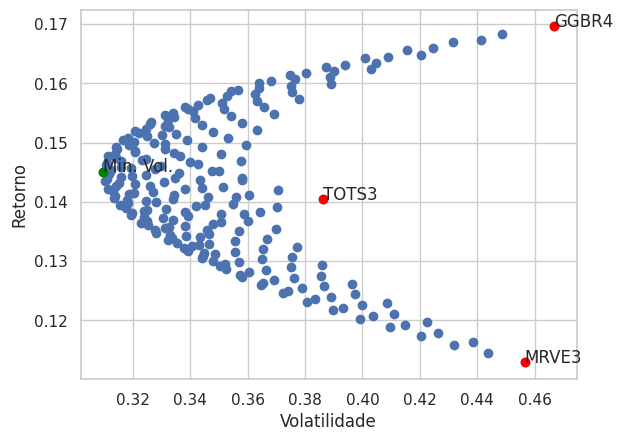

In [37]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['GGBR4.SA'], ret_aa['GGBR4.SA'], color='red');
plt.text(vol_aa['GGBR4.SA'], ret_aa['GGBR4.SA'], 'GGBR4');

plt.scatter(vol_aa['MRVE3.SA'], ret_aa['MRVE3.SA'], color='red');
plt.text(vol_aa['MRVE3.SA'], ret_aa['MRVE3.SA'], 'MRVE3');

plt.scatter(vol_aa['TOTS3.SA'], ret_aa['TOTS3.SA'], color='red');
plt.text(vol_aa['TOTS3.SA'], ret_aa['TOTS3.SA'], 'TOTS3');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [38]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = (dados - dados.shift(1)) / dados.shift(1)
dados_chg = dados_chg.fillna(0)

In [39]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/9))-1
print("Ret aa:\n", ret_aa)
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Ret aa:
 Ticker
AZZA3.SA    0.136042
BBAS3.SA    0.176086
CMIG4.SA    0.123303
GGBR4.SA    0.169583
MRVE3.SA    0.112895
TOTS3.SA    0.140414
PORT1       0.145038
dtype: float64
Vol aa:
 Ticker
AZZA3.SA    0.402268
BBAS3.SA    0.422337
CMIG4.SA    0.426859
GGBR4.SA    0.466706
MRVE3.SA    0.456425
TOTS3.SA    0.386286
PORT1       0.309722
dtype: float64


In [40]:
#Calcular drawdown (valor de queda de um ativo em comparação ao valor máximo de cotação anterior)
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

<ipython-input-40-1d630159f3bb>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-40-1d630159f3bb>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-40-1d630159f3bb>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ind in range(dados.count()[0]):
<ipython-input-40-1d630159f3bb>:6: FutureWarning: Series.__getitem__ treating keys as

AZZA3.SA   -51.781024
BBAS3.SA   -58.286993
CMIG4.SA   -72.178151
GGBR4.SA   -70.529927
MRVE3.SA   -72.684982
TOTS3.SA   -49.713333
PORT1      -50.711534
dtype: float64


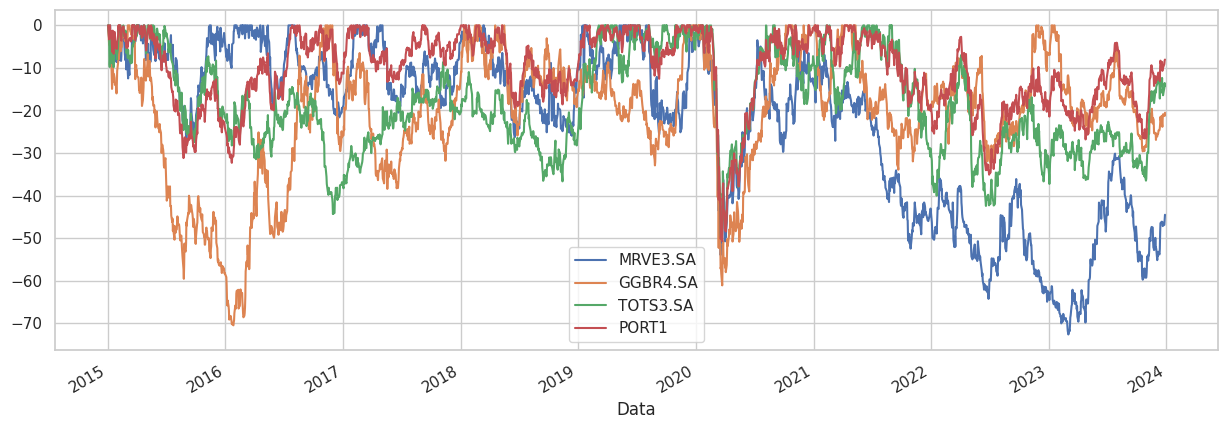

In [41]:
ddown[['MRVE3.SA', 'GGBR4.SA', 'TOTS3.SA', 'PORT1']].plot(figsize = (15,5));

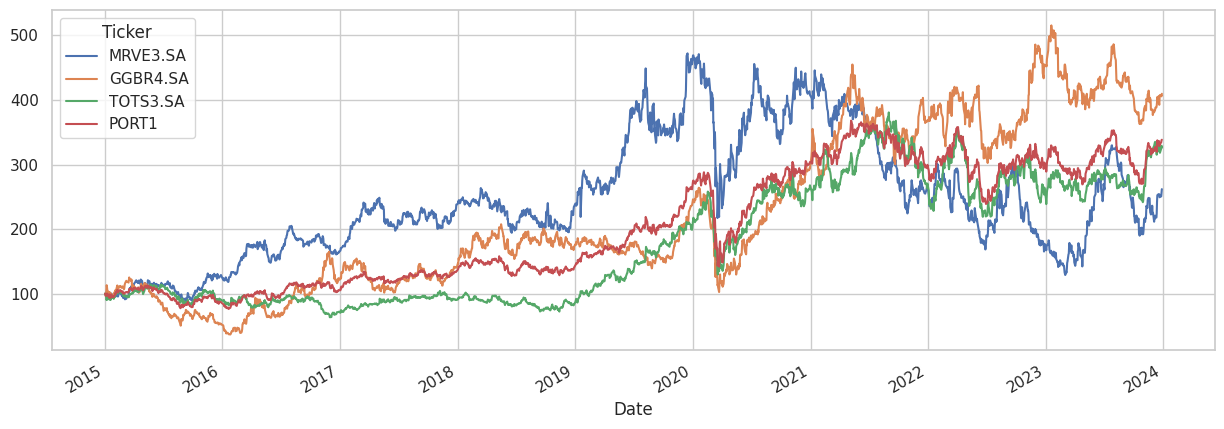

In [42]:
dados[['MRVE3.SA', 'GGBR4.SA', 'TOTS3.SA', 'PORT1']].plot(figsize = (15,5));